# 1.  问题阐述及分解

    当下看电影已经成为大部分的业余时间的消遣，无论是约会、朋友聚会亦或其他群体活动已经和电影密不可分了。不论是在家投影还是去电影院，人们一般都会先上 IMDB、豆瓣、淘票票等影评、购票APP上去查询电影的评分、演员阵容、电影题材等基本信息再决定是否进行观看。如果卡司是斯嘉丽·约翰逊（Scarlett Johansson、裘德·洛（Jude Law）等，那么心里可能已经对电影抱有较大的期待，又如导演是史蒂文·斯皮尔伯格、詹姆斯·卡梅隆等好莱坞大导演，那么潜意识可能已经给电影评分8以上了，并且不同导演喜爱的题材也会吸引不同的观影人群。此外，近年随着科技的不断发展与成熟，许多特效震撼人心，也吸引了大量观众去影院支持票房。据以上分析，提出如下问题：

- #### 问题 1：不同年代最受欢迎的电影类型Top10
    - #### 【Keywords】 top10 、电影类型、 时间
- #### 问题 2：不同类型电影的平均评分，评分最高的top10，其中存在水军吗?
    - #### 【Keywords】 电影类型 <— 评分（average）
- #### 问题 3：电影票房与哪些因素相关？
    - #### 【Keywords】 票房 <— 预算、评分、上映时间
- #### 问题 4：电影观看时长对评分有影响吗？
    - #### 【Keywords】 评分 <— 观影时间
- #### 问题 5：好莱坞两大巨头 Universal Pictures（环球影业） VS  Paramount Pictures （派拉蒙影业）
    - #### 【Keywords】 利润对比（总，年）、发行量对比（总，年）
- #### 问题 6：改编电影和原创电影的对比情况如何？
    - #### 【Keywords】 改编 VS 原创  (市场占有率、利润)
- #### 问题 7：哪些导演的电影更受观众喜爱？
    - #### 【Keywords】 导演、评分 
- #### 问题 8：哪些演员的电影总票房更高？
    - #### 【Keywords】 演员、评票房 ？    
- ### 后续增加 ^ _ ^

##### 【Inspiration】
- Can you categorize the films by type, such as animated or not? We don't have explicit labels for this, but it should be possible to build them from the crew's job titles.

- How sharp is the divide between major film studios and the independents? Do those two groups fall naturally out of a clustering analysis or is something more complicated going on?

##### 【Acknowledgements】
- 结合该作者分析，自己提出其他部分感兴趣的探究 https://zhuanlan.zhihu.com/p/37142181

# 2. 数据源介绍


#### 获取数据：https://www.kaggle.com/tmdb/tmdb-movie-metadata

##### 【Acknowledgements】
- This dataset was generated from The Movie Database API. This product uses the TMDb API but is not endorsed or certified by TMDb.
- Their API also provides access to data on many additional movies, actors and actresses, crew members, and TV shows. 






#### 字段解释： 
- imdb_id：IMDB 标识号
- popularity：在 Movie Database 上的相对页面查看次数
- budget：预算（美元）
- revenue：收入（美元）
- original_title：电影名称
- cast：演员列表，按 | 分隔，最多 5 名演员
- homepage：电影首页的 URL
- director：导演列表，按 | 分隔，最多 5 名导演
- tagline：电影的标语
- keywords：与电影相关的关键字，按 | 分隔，最多 5 个关键字
- overview：剧情摘要
- runtime：电影时长
- genres：风格列表，按 | 分隔，最多 5 种风格
- production_companies：制作公司列表，按 | 分隔，最多 5 家公司
- release_date：首次上映日期
- vote_count：评分次数
- vote_average：平均评分
- release_year：发行年份
- budget_adj：根据通货膨胀调整的预算（2010 年，美元）
- revenue_adj：根据通货膨胀调整的收入（2010 年，美元）

【Note】
   因为数据量不大，所以仅用csv进行加载，数据量过大时可以使用mysql数据库连接

### 加载所需的数据分析及可视化包

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns
import warnings
# 加载可视化显示在页面
%matplotlib inline
#更改设计风格  R 语言的
plt.style.use('ggplot')
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
warnings.filterwarnings('ignore')

In [15]:
moviesDf = pd.read_csv('./tmdb_5000_movies.csv')
creditsDf = pd.read_csv("./tmdb_5000_credits.csv")

- #### 分别查看movieDf数据集、creditsDf数据集的信息

In [16]:
moviesDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [17]:
creditsDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
movie_id    4803 non-null int64
title       4803 non-null object
cast        4803 non-null object
crew        4803 non-null object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


# 3. 数据清洗

- 先将两个表的重复字典 title 删除
- 可以通过movieDf的 id 与 creditsDf 的movie_id 将两个表合并起来

###  a.缺失值处理
###  b.数据类型转换

In [18]:

del creditsDf['title']


In [20]:
merged = pd.merge(moviesDf, creditsDf ,left_on='id',right_on='movie_id')
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

#### 选取后续需要分析的列组成中间表

In [21]:
subDf = merged[['id','title','vote_average','production_companies','genres',
                 'release_date','keywords','runtime','budget','revenue','vote_count','popularity']]
subDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 12 columns):
id                      4803 non-null int64
title                   4803 non-null object
vote_average            4803 non-null float64
production_companies    4803 non-null object
genres                  4803 non-null object
release_date            4802 non-null object
keywords                4803 non-null object
runtime                 4801 non-null float64
budget                  4803 non-null int64
revenue                 4803 non-null int64
vote_count              4803 non-null int64
popularity              4803 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 487.8+ KB


- ### 缺失值处理

- #### release_date 缺失一条数据 
    - 可通过网络查询补全缺失数据， 查询结果上映日期位2014-06-01，填补缺失数据
- #### runtime 缺失两条数据且存在时长为0的
    - 标记时长为零为异常数据 np.NaN
    - 缺失数据采用平均数填充
- #### 【Note】:
  缺失数据的处理方法有三类：
  - 不做处理，直接忽略(适用于样本大，缺失数据较少)
  - 使用平均值填充（数值型），众数填充(category)
  - 使用机器学习或其他算法进行缺失值填补

In [328]:
subDf.loc[subDf['release_date'].isnull(),'title']

Series([], Name: title, dtype: object)

In [330]:
subDf['release_date'] = subDf['release_date'].fillna('2014-06-01')
subDf.loc[4553, 'release_date']

'2014-06-01'

In [321]:
subDf.runtime[subDf['runtime'] == 0 ] = np.NaN
subDf['runtime'] = subDf['runtime'].fillna(subDf['runtime'].mean())

In [322]:
subDf['runtime'].mean()

107.66039255838751

In [323]:
subDf.describe()

,id,vote_average,runtime,budget,revenue,vote_count,popularity,release_year,Universal Pictures,Paramount Pictures,profit,Universal_profit,Paramount_profit
count,4803.000000,4803.000000,4803.000000,4.803000e+03,4.803000e+03,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4.803000e+03,4.803000e+03,4.803000e+03
mean,57165.484281,6.092172,107.660393,2.904504e+07,8.226064e+07,690.217989,21.492301,2002.471164,0.065376,0.059338,5.321560e+07,6.035884e+06,5.739935e+06
std,88694.614033,1.194612,20.669337,4.072239e+07,1.628571e+08,1234.585891,31.816650,12.414176,0.247214,0.236281,1.359677e+08,4.796136e+07,5.117865e+07
min,5.000000,0.000000,14.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1916.000000,0.000000,0.000000,-1.657101e+08,-1.500000e+08,-9.196958e+07
25%,9014.500000,5.600000,94.000000,7.900000e+05,0.000000e+00,54.000000,4.668070,1999.000000,0.000000,0.000000,-7.995375e+05,0.000000e+00,0.000000e+00
50%,14629.000000,6.200000,104.000000,1.500000e+07,1.917000e+07,235.000000,12.921594,2005.000000,0.000000,0.000000,2.511317e+06,0.000000e+00,0.000000e+00
75%,58610.500000,6.800000,117.500000,4.000000e+07,9.291719e+07,737.000000,28.313505,2011.000000,0.000000,0.000000,5.531286e+07,0.000000e+00,0.000000e+00
max,459488.000000,10.000000,338.000000,3.800000e+08,2.787965e+09,13752.000000,875.581305,2017.000000,1.000000,1.000000,2.550965e+09,1.316249e+09,1.645034e+09


In [324]:
subDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 20 columns):
id                      4803 non-null int64
title                   4803 non-null object
vote_average            4803 non-null float64
production_companies    4803 non-null object
genres                  4803 non-null object
release_date            4803 non-null object
keywords                4803 non-null object
runtime                 4803 non-null float64
budget                  4803 non-null int64
revenue                 4803 non-null int64
vote_count              4803 non-null int64
popularity              4803 non-null float64
release_year            4803 non-null int64
Universal Pictures      4803 non-null int64
Paramount Pictures      4803 non-null int64
profit                  4803 non-null int64
Universal_profit        4803 non-null int64
Paramount_profit        4803 non-null int64
original                4803 non-null object
original_if             4803 non-null object


In [37]:
subDf.head()

,id,title,vote_average,production_companies,genres,release_date,keywords,runtime,budget,revenue,vote_count,popularity,release_year
0,19995,Avatar,7.2,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","Action,Adventure,Fantasy,Science Fiction",2009-12-10,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",162.0,237000000,2787965087,11800,150.437577,2009
1,285,Pirates of the Caribbean: At World's End,6.9,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","Adventure,Fantasy,Action",2007-05-19,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",169.0,300000000,961000000,4500,139.082615,2007
2,206647,Spectre,6.3,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","Action,Adventure,Crime",2015-10-26,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",148.0,245000000,880674609,4466,107.376788,2015
3,49026,The Dark Knight Rises,7.6,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","Action,Crime,Drama,Thriller",2012-07-16,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",165.0,250000000,1084939099,9106,112.312950,2012
4,49529,John Carter,6.1,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","Action,Adventure,Science Fiction",2012-03-07,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",132.0,260000000,284139100,2124,43.926995,2012


In [73]:
# #release_date转换为年月日,并提取年份
# subDf['release_year']=pd.to_datetime(subDf['release_date'],format='%Y-%m-%d').dt.year
# subDf.head()
# #json格式转换转换成字符串
# #genres
# def getname(x):
#     a=[]
#     for i in x:
#         a.append(i['name'])
#     return ','.join(a)
# subDf['genres']=subDf['genres'].apply(json.loads)
# subDf['genres']=subDf['genres'].apply(getname)
subDf['genres'].head()

0    Action,Adventure,Fantasy,Science Fiction
1                    Adventure,Fantasy,Action
2                      Action,Adventure,Crime
3                 Action,Crime,Drama,Thriller
4            Action,Adventure,Science Fiction
Name: genres, dtype: object

In [40]:
#production_companies 
subDf['production_companies']=subDf['production_companies'].apply(json.loads)
subDf['production_companies']=subDf['production_companies'].apply(getname)
#keywords
subDf['keywords']=subDf['keywords'].apply(json.loads)
subDf['keywords']=subDf['keywords'].apply(getname)

In [54]:
subDf.head()

,id,title,vote_average,production_companies,genres,release_date,keywords,runtime,budget,revenue,vote_count,popularity,release_year
0,19995,Avatar,7.2,"Ingenious Film Partners,Twentieth Century Fox ...","Action,Adventure,Fantasy,Science Fiction",2009-12-10,"culture clash,future,space war,space colony,so...",162.0,237000000,2787965087,11800,150.437577,2009
1,285,Pirates of the Caribbean: At World's End,6.9,"Walt Disney Pictures,Jerry Bruckheimer Films,S...","Adventure,Fantasy,Action",2007-05-19,"ocean,drug abuse,exotic island,east india trad...",169.0,300000000,961000000,4500,139.082615,2007
2,206647,Spectre,6.3,"Columbia Pictures,Danjaq,B24","Action,Adventure,Crime",2015-10-26,"spy,based on novel,secret agent,sequel,mi6,bri...",148.0,245000000,880674609,4466,107.376788,2015
3,49026,The Dark Knight Rises,7.6,"Legendary Pictures,Warner Bros.,DC Entertainme...","Action,Crime,Drama,Thriller",2012-07-16,"dc comics,crime fighter,terrorist,secret ident...",165.0,250000000,1084939099,9106,112.312950,2012
4,49529,John Carter,6.1,Walt Disney Pictures,"Action,Adventure,Science Fiction",2012-03-07,"based on novel,mars,medallion,space travel,pri...",132.0,260000000,284139100,2124,43.926995,2012


# 4. 分析问题

- ### 获取电影类型

In [72]:
genreslist = set()
for s in subDf['genres'].str.split(","):
    genreslist = set().union(s,genreslist)

genreslist = list(genreslist)
genreslist.remove('')
genreslist

['Science Fiction',
 'TV Movie',
 'Mystery',
 'Comedy',
 'Music',
 'Romance',
 'Thriller',
 'Animation',
 'Western',
 'Crime',
 'History',
 'War',
 'Horror',
 'Documentary',
 'Fantasy',
 'Foreign',
 'Drama',
 'Family',
 'Action',
 'Adventure']

### 新建一个DataFrame，包含电影分类与发行年份

In [82]:
genresdf = pd.DataFrame()

# 对电影类型进行one-hot encoding
for genre in genreslist:
    genresdf[genre] = subDf['genres'].str.contains(genre).apply(lambda x: 1 if x else 0) 
    
#genresdf['release_year'] = subDf['release_year']
genresdf.index = subDf['release_year']
genresdf = genresdf.sort_index()
genresdf.head()

,Science Fiction,TV Movie,Mystery,Comedy,Music,Romance,Thriller,Animation,Western,Crime,History,War,Horror,Documentary,Fantasy,Foreign,Drama,Family,Action,Adventure
release_year,,,,,,,,,,,,,,,,,,,,
1916,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1925,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1927,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1929,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1929,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [102]:
#对每个类型的电影按年份求和
genresdf=genresdf.groupby('release_year').sum()
total=genresdf.sum().sort_values(ascending=False)

In [103]:
total = total[:10]

In [104]:
total

Drama              2297
Comedy             1722
Thriller           1274
Action             1154
Romance             894
Adventure           790
Crime               696
Science Fiction     535
Horror              519
Family              513
dtype: int64

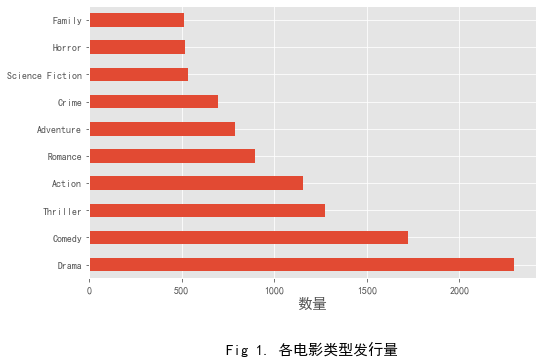

In [261]:
total.plot(kind='barh', figsize=(8, 5))
plt.title('Fig 1. 各电影类型发行量', fontsize=15, y=-0.3)
plt.xlabel('数量',fontsize=15)
plt.grid(True)
plt.show()

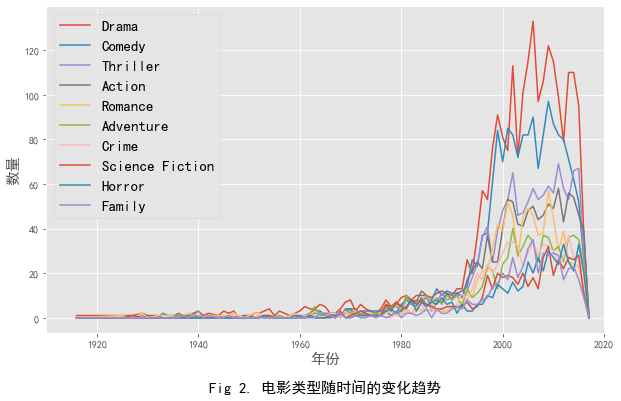

In [262]:
#电影类型随时间推移发生的变化
genresdf=genresdf[['Drama','Comedy','Thriller','Action','Romance','Adventure','Crime','Science Fiction','Horror','Family']]
genresdf.plot(figsize=(10,6))
plt.title('Fig 2. 电影类型随时间的变化趋势',y=-0.2,fontsize=15)
plt.xlabel('年份',fontsize=15)
plt.ylabel('数量',fontsize=15)
plt.xlim(xmin=1910,xmax=2020)
plt.legend(fontsize=15)
plt.grid(True)
plt.show()

### 由 Fig 1 和 Fig 2 分析可得
- 电影市场在1990年后发展迅速，其中戏剧（Drama）增长最快，喜剧（Comedy）次之。
- 当今市场以戏剧、喜剧为主流，投资这两个类型的电影是不错的选择。

## 2. 与电影票房相关的因素有哪些？

In [121]:
corrdf = subDf.corr()
corrdf['revenue'].sort_values(ascending=False)

revenue         1.000000
vote_count      0.781487
budget          0.730823
popularity      0.644724
runtime         0.251080
vote_average    0.197150
release_year    0.090084
id             -0.050425
Name: revenue, dtype: float64

Text(0.5, 1, 'Fig 3. 与票房相关因素热力图')

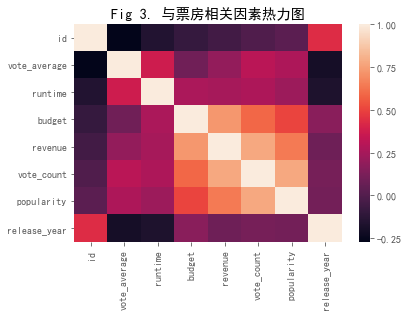

In [269]:
sns.heatmap(corrdf)
plt.title('Fig 3. 与票房相关因素热力图')

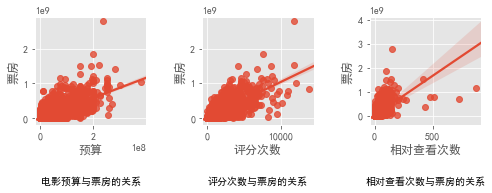

In [271]:
#票房与预算关系
plt.figure(figsize=(8,2))

plt.subplots_adjust(wspace=0.5)
plt.subplot(131)
sns.regplot(subDf['budget'],subDf['revenue'])
plt.title('电影预算与票房的关系',fontsize=10,y=-0.6)
plt.xlabel('预算')
plt.ylabel('票房')
plt.grid(True)

plt.subplot(132)
sns.regplot(subDf['vote_count'],subDf['revenue'])
plt.title('评分次数与票房的关系',fontsize=10,y=-0.6)
plt.xlabel('评分次数')
plt.ylabel('票房')
plt.grid(True)

plt.subplot(133)
sns.regplot(subDf['popularity'],subDf['revenue'])
plt.title('相对查看次数与票房的关系',fontsize=10,y=-0.6)
plt.xlabel('相对查看次数')
plt.ylabel('票房')
plt.grid(True)


#### 由Fig3 和 Fig 4 可得
- 电影票房与预算、评分次数、Movie Database 上的相对页面查看次数相关性较高，且呈线性相关。

#### 作为电影制作公司，保证一定的电影预算是电影票房成功的基础。

## 3.  Universal Pictures 和 Paramount Pictures 各方面对比

- #### 电影发行量对比（总发行量、每年发行量）
- #### 利润对比   （总利润、 年利润）

- #### 电影总发行量对比

In [186]:
subDf['Universal Pictures'] = subDf['production_companies'].str.contains('Universal Pictures').apply(lambda x :1 if x else 0)
subDf['Paramount Pictures'] = subDf['production_companies'].str.contains('Paramount Pictures').apply(lambda x :1 if x else 0)

Universal_total = subDf['Universal Pictures'].sum()
Paramount_total = subDf['Paramount Pictures'].sum()
total_VS = pd.Series({
                        'Universal Pictures' :Universal_total,
                        'Paramount Pictures' :Paramount_total
})
total_VS

Universal Pictures    314
Paramount Pictures    285
dtype: int64

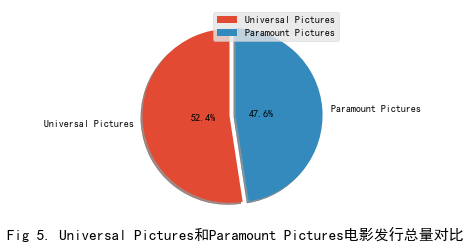

In [272]:
#定义饼状图的标签，标签是列表
labels = ['Universal Pictures','Paramount Pictures']
#将某部分爆炸出来， 使用括号，将第一块分割出来，数值的大小是分割出来的与其他两块的间隙
explode = (0.07,0)

patches,l_text,p_text = plt.pie(total_VS,explode=explode,labels=labels,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = True,
                                startangle = 90,pctdistance = 0.3)
# plt.axis('equal')
plt.title('Fig 5. Universal Pictures和Paramount Pictures电影发行总量对比',fontsize=15,y=-0.1)
plt.legend()
plt.show()

- #### 电影年发行量对比

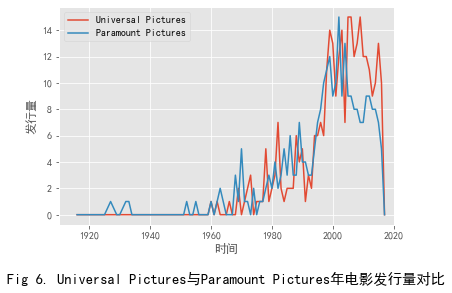

In [273]:
company = subDf.groupby('release_year').sum()
company['Universal Pictures'].plot()
company['Paramount Pictures'].plot()
plt.xlabel('时间')
plt.xlim(xmin=1910,xmax=2020)
plt.ylabel('发行量')
plt.title('Fig 6. Universal Pictures与Paramount Pictures年电影发行量对比',y=-0.3)
plt.grid(True)
plt.legend()
plt.show()

- #### 总利润对比

In [233]:
subDf['profit'] = subDf['revenue'] - subDf['budget']
subDf['Universal_profit'] = subDf['Universal Pictures'] * subDf['profit']
subDf['Paramount_profit'] = subDf['Paramount Pictures'] * subDf['profit']
Universal_profit=subDf['Universal_profit'].sum()
Paramount_profit=subDf['Paramount_profit'].sum()
profit_VS=pd.Series({'Universal_profit':Universal_profit,'Paramount_profit':Paramount_profit})
profit_VS

Universal_profit    28990348596
Paramount_profit    27568910158
dtype: int64

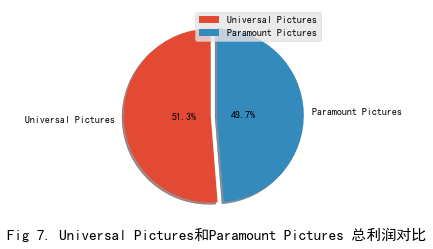

In [274]:
#定义饼状图的标签，标签是列表
labels = ['Universal Pictures','Paramount Pictures']
#将某部分爆炸出来， 使用括号，将第一块分割出来，数值的大小是分割出来的与其他两块的间隙
explode = (0.07,0)

patches,l_text,p_text = plt.pie(profit_VS,explode=explode,labels=labels,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = True,
                                startangle = 90,pctdistance = 0.3)
# plt.axis('equal')
plt.title('Fig 7. Universal Pictures和Paramount Pictures 总利润对比',fontsize=15,y=-0.1)
plt.legend()
plt.show()

- #### 年利润对比

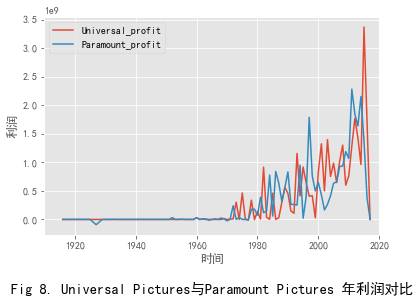

In [275]:
year_profit= subDf.groupby('release_year').sum()
year_profit['Universal_profit'].plot()
year_profit['Paramount_profit'].plot()
plt.xlabel('时间')
plt.xlim(xmin=1910,xmax=2020)
plt.ylabel('利润')
plt.title('Fig 8. Universal Pictures与Paramount Pictures 年利润对比',y=-0.3)
plt.grid(True)
plt.legend()
plt.show()

#### 由Fig 5—— Fig 8 可得
- #### 在电影发行总量和总利润的对比中，相较Paramount Pictures，Universal Pictures占有一定优势。
- #### 从年发行量和年利润的对比中，可以看出Universal Pictures发展相对稳定。

##  4. 改编电影与原创电影情况对比

- #### 发行数量对比
- #### 平均利润对比

In [253]:
subDf['original_if'] = subDf['keywords'].str.contains('based on novel').apply(lambda x: 'not original' if x else ' original')
subDf['original_if'].head()
key_count = subDf['original_if'].value_counts()
key_count

 original       4606
not original     197
Name: original_if, dtype: int64

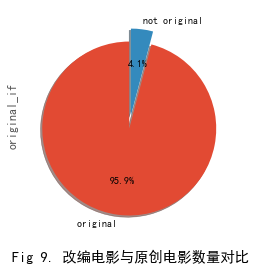

In [276]:
key_count.plot(kind='pie',autopct='%1.1f%%',
                explode=(0.15,0),startangle=90,labeldistance=1.1,shadow=True)
plt.title('Fig 9. 改编电影与原创电影数量对比', y=-0.2)
plt.show()

- #### 利润对比

In [255]:
originalVS=subDf.groupby('original_if')['profit'].mean()
originalVS

original_if
 original       5.127943e+07
not original    9.848457e+07
Name: profit, dtype: float64

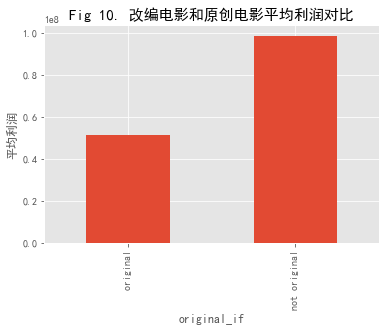

In [277]:
originalVS.plot(kind='bar')
plt.title('Fig 10. 改编电影和原创电影平均利润对比',fontsize=15)
plt.ylabel('平均利润',fontsize=12)
plt.grid(True)
plt.show()

- #### 结合Fig 9, Fig 10可得
    - 原创电影市场占比较大，但是改编电影的平均利润高于原创电影
    - 这可能是因为原创电影发行量大，其中电影的质量千差万别，
    - 改编电影，一般是基于小说，已存在一定的观众基础

#### 建议考虑投资原创电影更为贴合主流市场 ，如果有优秀的改编剧本也可以考虑投资改编电影。

## 结论

#### 1、随着时间推移，戏剧和喜剧电影增长迅速，占据了主流市场，是不错的投资选择。

####  2、电影票房与电影预算相关性较高，一定的票房预算是电影成功的基础。

####  3、Universal Pictures 和 Paramount Pictures两家公司相比，Universal Pictures在电影发行总量和总利润方面占有优势，发展态势稳步提升。

####  4、原创电影在市场中占据了绝大部分份额，但是改编电影平均利润更高。可以考虑投资原创电影以迎合主流市场，也可以考虑投资优秀剧本的改编电影。


^ _ ^